# Project - Airline Sentiment Analysis

# Importing Libraries

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


# Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Python Course/Tweets.csv')

In [ ]:
dataset.head()

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


In [ ]:
dataset.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:
text = dataset['text'].values
text=[word_tokenize(doc) for doc in text]
sentiment=dataset['airline_sentiment'].values

In [ ]:
text[1]

['@',
 'VirginAmerica',
 'plus',
 'you',
 "'ve",
 'added',
 'commercials',
 'to',
 'the',
 'experience',
 '...',
 'tacky',
 '.']

In [ ]:
#print(all_documents_modified[0])

In [ ]:
documents = [(text[i] , sentiment[i]) for i in range(4000)]

In [ ]:
documents[1]

(['@',
  'VirginAmerica',
  'plus',
  'you',
  "'ve",
  'added',
  'commercials',
  'to',
  'the',
  'experience',
  '...',
  'tacky',
  '.'],
 'positive')

# Cleaning Dataset (TOKENIZING, LEMMATIZING, (REMOVING STOPWORDS, PUNCTUATIONS) )

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
from nltk.corpus import wordnet
def get_simple_pos(tag):

    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
stops = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stops.update(punctuations)
stops, string.punctuation

({'!',
  '"',
  '#',
  '$',
  '%',
  '&',
  "'",
  '(',
  ')',
  '*',
  '+',
  ',',
  '-',
  '.',
  '/',
  ':',
  ';',
  '<',
  '=',
  '>',
  '?',
  '@',
  '[',
  '\\',
  ']',
  '^',
  '_',
  '`',
  'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  'if',
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it's",
  'its',
  'itself',
  'just',
  'll',


In [39]:
def clean_review(words):
    output_words = []
    for w in words:
        if w.lower() not in stops:
            pos = pos_tag([w])
            clean_word = lemmatizer.lemmatize(w, pos = get_simple_pos(pos[0][1]))
            output_words.append(clean_word.lower())
    return output_words

In [40]:
document = [(clean_review(doc), category) for doc, category in documents]

In [41]:
document[3]

(['virginamerica',
  "'s",
  'really',
  'aggressive',
  'blast',
  'obnoxious',
  '``',
  'entertainment',
  "''",
  'guest',
  'face',
  'amp',
  'little',
  'recourse'],
 'negative')

In [42]:
for i in range(len(document)//25):
    print(document[i])

(['virginamerica', 'dhepburn', 'say'], 'neutral')
(['virginamerica', 'plus', "'ve", 'add', 'commercial', 'experience', '...', 'tacky'], 'positive')
(['virginamerica', "n't", 'today', '...', 'must', 'mean', 'need', 'take', 'another', 'trip'], 'neutral')
(['virginamerica', "'s", 'really', 'aggressive', 'blast', 'obnoxious', '``', 'entertainment', "''", 'guest', 'face', 'amp', 'little', 'recourse'], 'negative')
(['virginamerica', "'s", 'really', 'big', 'bad', 'thing'], 'negative')
(['virginamerica', 'seriously', 'would', 'pay', '30', 'flight', 'seat', "n't", 'play', "'s", 'really', 'bad', 'thing', 'fly', 'va'], 'negative')
(['virginamerica', 'yes', 'nearly', 'every', 'time', 'fly', 'vx', '“', 'ear', 'worm', '”', '’', 'go', 'away'], 'positive')
(['virginamerica', 'really', 'miss', 'prime', 'opportunity', 'men', 'without', 'hats', 'parody', 'http', '//t.co/mwpg7grezp'], 'neutral')
(['virginamerica', 'well', "didn't…but", '-d'], 'positive')
(['virginamerica', 'amaze', 'arrive', 'hour', 'earl

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
categories = [category for document, category in documents]
categories[:10]

['neutral',
 'positive',
 'neutral',
 'negative',
 'negative',
 'negative',
 'positive',
 'neutral',
 'positive',
 'positive']

In [45]:
text_documents = [" ".join(document) for document, category in documents]
text_documents

['@ VirginAmerica What @ dhepburn said .',
 "@ VirginAmerica plus you 've added commercials to the experience ... tacky .",
 "@ VirginAmerica I did n't today ... Must mean I need to take another trip !",
 "@ VirginAmerica it 's really aggressive to blast obnoxious `` entertainment '' in your guests ' faces & amp ; they have little recourse",
 "@ VirginAmerica and it 's a really big bad thing about it",
 "@ VirginAmerica seriously would pay $ 30 a flight for seats that did n't have this playing . it 's really the only bad thing about flying VA",
 '@ VirginAmerica yes , nearly every time I fly VX this “ ear worm ” won ’ t go away : )',
 '@ VirginAmerica Really missed a prime opportunity for Men Without Hats parody , there . https : //t.co/mWpG7grEZP',
 "@ virginamerica Well , I didn't…but NOW I DO ! : -D",
 "@ VirginAmerica it was amazing , and arrived an hour early . You 're too good to me .",
 '@ VirginAmerica did you know that suicide is the second leading cause of death among teens 1

# SPLITTING THE DATASET INTO TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(text_documents, categories)

In [ ]:
#Testing index
#count_vec = CountVectorizer(max_features = 5000)
#x_train_features = count_vec.fit_transform(x_train)
#x_test_features = count_vec.transform(x_test)

# Vectorization TO GET MAXIMUM FREQUENCY WORDS

In [ ]:
count_vect=TfidfVectorizer(max_features=5000, max_df=0.8, min_df=0.001)
x_train_features=count_vect.fit_transform(x_train)
x_test_features=count_vect.transform(x_test)

# USING SVM CLASSIFIER

In [ ]:
clf = SVC()
clf.fit(x_train_features,y_train)
ypred1 = clf.predict(x_test_features)
clf.score(x_test_features, y_test)

0.763

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred1, labels=['negative','positive', 'neutral'])

array([[652,   7,  14],
       [ 73,  57,  13],
       [120,  10,  54]])

# USING RANDOM FOREST CLASSIFIER

In [ ]:
clf1=RandomForestClassifier(n_estimators=2000, n_jobs=-1)
clf1.fit(x_train_features, y_train)
ypred2 = clf1.predict(x_test_features)
clf1.score(x_test_features,y_test)

0.763

In [ ]:
confusion_matrix(y_test, ypred2, labels=['negative','positive','neutral'])

array([[652,   8,  13],
       [ 74,  51,  18],
       [111,  13,  60]])

# COMBINING OUR 2 CLASSIFIER AND CHECKING THE ACCURACY

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('MNB', MultinomialNB()), ('SVC',SVC(probability=True))], voting='soft').fit(x_train_features,y_train)


In [ ]:
ypred4 = ensemble.predict(x_test_features)

In [ ]:
print('The accuracy for MNB and SVC is:',ensemble.score(x_test_features,y_test))

The accuracy for MNB and SVC is: 0.77


In [ ]:
confusion_matrix(y_test, ypred4, labels=['negative','positive','neutral'])

array([[647,   8,  18],
       [ 65,  66,  12],
       [115,  12,  57]])

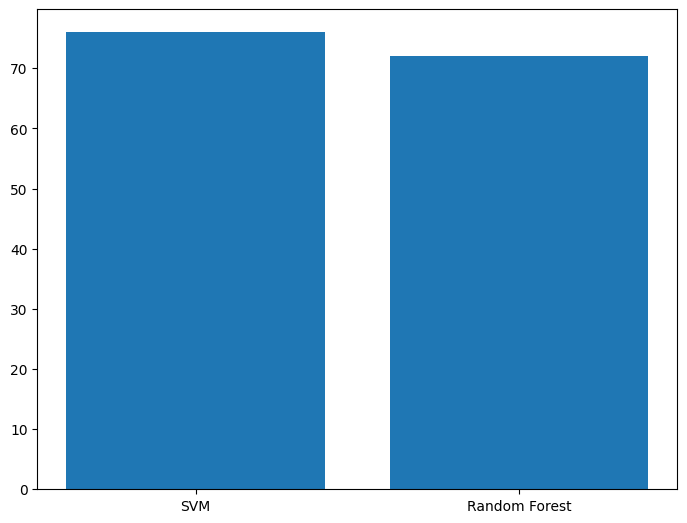

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['SVM', 'Random Forest']
students = [76,72]
ax.bar(langs,students)
plt.show()